In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection



folder="D:\SoftwareWebApps\Python\GeoProjects\AI&ML\\"
df=pd.read_csv(folder+'lasdata.csv')
df.head()

,DEPTH,DT,GR,LLD,LLS,PHIE,PHIT,RHOB,SW,TNPH,VWCL
0,1319.1744,130.6167,63.4215,5.0974,6.2971,0.239997,0.339868,2.0867,0.8752,0.5094,0.3809
1,1319.3268,124.4448,68.9760,4.9085,6.3670,0.239702,0.325714,2.1098,0.9577,0.4700,0.3281
2,1319.4792,119.7209,72.3721,4.7866,6.3894,0.227412,0.310568,2.1375,0.9990,0.4477,0.3172
3,1319.6316,115.9378,71.9963,4.9417,6.7637,0.197579,0.292935,2.1738,0.9855,0.4474,0.3637
4,1319.7840,116.1676,73.5745,5.1050,6.9860,0.192031,0.293053,2.1750,0.9494,0.4569,0.3853


In [2]:

def add_squares(df, col_names):
    new_cols=df[col_names].values
    newcol_names=['sqr_'+c for c in col_names]
    df=pd.DataFrame(np.append(new_cols,np.square(new_cols),axis=1),columns=np.append(col_names,newcol_names))
    return df

In [3]:
# np.square(new_cols[0:5,0:5])
# np.square(new_cols)

# new_cols,np.append(new_cols,np.square(new_cols),axis=1)

column_nos4xd=[0,1,2,3,4,7,9]
column_nos2bsqrd=[1,2,3,4,7,9]
column_nos4yd=[0,5,6,8,10]
Xd=df[df.columns[column_nos4xd]]
# Xd=add_squares(Xd, df.columns[column_nos2bsqrd])
Yd=df[df.columns[column_nos4yd]]

# Xd

In [4]:
# las.data.transpose()


X1 = Xd.values[:,0:] 
Y1 = Yd.values[:,1:] 
validation_size = 0.01
seed = 7
Xo_train, Xo_validation, Y_train, Y_validation = model_selection.train_test_split(X1, Y1, test_size=validation_size, random_state=seed)
X_train, X_validation =Xo_train[:,1:], Xo_validation[:,1:]
scoring = 'accuracy'

n_samples,num_features=X_train.shape
num_classes=Y_train.shape[1]
batch_size=n_samples
# Parameters
batch_size,num_features,num_classes


(14704, 6, 4)

In [5]:
# Xd

In [6]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
# Fit only to the training data
scaler_x.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler_x.transform(X_train)
X_validation = scaler_x.transform(X_validation)

scaler_y = StandardScaler()
# Fit only to the training data
scaler_y.fit(Y_train)
# Now apply the transformations to the data:
Y_train = scaler_y.transform(Y_train)
Y_validation = scaler_y.transform(Y_validation)

In [7]:
# Y_train[0:10,0:1]

In [8]:
import tensorflow as tf
from __future__ import print_function
from tensorflow.python.ops import resources
from tensorflow.contrib.tensor_forest.python import tensor_forest

# Parameters
# num_steps = 500 # Total steps to train

num_trees = 10
max_nodes = 1000

# Input and Target data
X = tf.placeholder(tf.float32, shape=[None, num_features])
Y = tf.placeholder(tf.float32, [None, num_classes]) 

rng = np.random
# Set model weights
W = tf.Variable(rng.randn(num_features, num_classes).astype(np.float32), name="weight")
b = tf.Variable(rng.randn(num_classes).astype(np.float32), name="bias")

In [9]:
learning_rate = 0.1


# Construct a linear model
pred1 = tf.add(tf.matmul(X, W), b)
# pred = tf.add(tf.multiply(X, W), b)
optcost = tf.reduce_sum(tf.pow(pred1-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(optcost)
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [10]:
display_step = 2000
bdisplay_step = 100
minbatch_size=100
training_epochs = 1000
# Start training
# with tf.Session() as sess:
#     sess.run(init)
#     i=0
#     # Fit all training data
#     for epoch in range(training_epochs):
#         i +=1
#         sess.run(optimizer, feed_dict={X: X_train, Y:Y_train})
#         if (epoch+1) % bdisplay_step == 0:
#             c = sess.run(optcost, feed_dict={X: X_train, Y:Y_train})
#             print( "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
#     print ("Optimization Finished!")
#     training_cost = sess.run(optcost, feed_dict={X: X_train, Y:Y_train})
# #     v_cost = sess.run(optcost, feed_dict={X: X_train, Y:Y_train})
#     print ("Training cost=", c, training_cost,"W=", sess.run(W), "b=", sess.run(b), '\n')
#     fW=sess.run(W)
#     fb=sess.run(b)
#     Y_pred= sess.run(tf.matmul(X_train.astype(np.float32),W))
# #     print(type(X_train[0,0]),type(sess.run(W)[0,0]))

# Following is minibatch online training
# print("*****************************************")
with tf.Session() as sess:
    sess.run(init)
    n_iterations = 50000

    # minibatch training
    for i in range(n_iterations):
        rand_index = np.random.choice(n_samples,minbatch_size)
        rand_x = X_train[rand_index]
        rand_y = Y_train[rand_index]
        sess.run(optimizer, feed_dict={X: rand_x, Y:rand_y})
        if (i+1) % display_step == 0:
            c = sess.run(optcost, feed_dict={X: rand_x, Y:rand_y})
            print( "Run:", '%04d' % (i+1), "cost=", "{:.9f}".format(c))

    print ("Optimization Finished!")
    training_cost = sess.run(optcost, feed_dict={X: X_train, Y:Y_train})
    print ("Training cost=", c, training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    fW=sess.run(W)
    fb=sess.run(b)
    Y_pred= sess.run(tf.matmul(X_train.astype(np.float32),W))




Run: 2000 cost= 0.018178126
Run: 4000 cost= 0.010175919
Run: 6000 cost= 0.007394158
Run: 8000 cost= 0.006418063
Run: 10000 cost= 0.008407925
Run: 12000 cost= 0.009275586
Run: 14000 cost= 0.007212715
Run: 16000 cost= 0.008306772
Run: 18000 cost= 0.006476240
Run: 20000 cost= 0.005391268
Run: 22000 cost= 0.008105895
Run: 24000 cost= 0.005105352
Run: 26000 cost= 0.007860057
Run: 28000 cost= 0.007397525
Run: 30000 cost= 0.008580338
Run: 32000 cost= 0.009336907
Run: 34000 cost= 0.007330189
Run: 36000 cost= 0.007687035
Run: 38000 cost= 0.005363351
Run: 40000 cost= 0.004220988
Run: 42000 cost= 0.006485938
Run: 44000 cost= 0.005970522
Run: 46000 cost= 0.008241116
Run: 48000 cost= 0.006872403
Run: 50000 cost= 0.008537118
Optimization Finished!
Training cost= 0.008537118 1.0434481 W= [[ 0.16584702  0.14534579 -0.08209518 -0.01807931]
 [-0.21486436  0.06765656  0.07507495  0.28089106]
 [ 0.387901    0.22103052 -0.4208188  -0.16953596]
 [-0.12155073  0.00842153 -0.11059133  0.00115021]
 [-0.2636967

In [19]:
Yt

,DEPTH,PHIE,PHIT,SW,VWCL
0,1349.5,0.021151,0.205394,1.0,0.7401
1,1349.6,0.022946,0.206018,1.0,0.7354
2,1349.7,0.016858,0.204269,1.0,0.7529
3,1349.8,0.000100,0.196036,1.0,0.7871
4,1349.9,0.000100,0.203015,1.0,0.8151
5,1350.0,0.000100,0.208884,1.0,0.8387
6,1350.1,0.000100,0.209172,1.0,0.8399
7,1350.2,0.000100,0.208445,1.0,0.8370
8,1350.3,0.000100,0.207392,1.0,0.8327
9,1350.4,0.000100,0.207881,1.0,0.8347


In [12]:

# W= np.array([[ 0.16330323,  0.14229785, -0.085071,   -0.01773075], \
#  [-0.21117081 , 0.06463999 , 0.08643706,  0.2787899 ], \
#  [ 0.18121253 , 0.14187634 ,-0.63060653 ,-0.23648901], \
#  [ 0.08302196,  0.08415918,  0.10065787 , 0.07010479], \
#  [-0.262355  ,  0.12125835,  0.17512348,  0.6792095 ], \
#  [-0.4219557 , -0.20905422 , 0.2702185 ,  0.307619  ]])
# b= [-7.4699367e-09, -2.3569577e-09 ,-1.5058861e-08  ,7.4384667e-09]
prediction_set_or = pd.read_csv(folder+"lasdata-predict.csv")

# Xt=prediction_set_or[prediction_set_or.columns[[0,1,2,3,4,7,9]]]

Xt=prediction_set_or[prediction_set_or.columns[column_nos4xd]]
# Xt=add_squares(Xt, prediction_set_or.columns[column_nos2bsqrd])
Yt=prediction_set_or[prediction_set_or.columns[column_nos4yd]]


X2 = Xt.values[:,0:] [:,1:]
X_t = scaler_x.transform(X2)
with tf.Session() as sess:
    sess.run(init)
    print((W))
    Y_t_pred= sess.run(tf.add(tf.matmul(X_t.astype(np.float32),fW.astype(np.float32)),fb))
# Yt=prediction_set_or[prediction_set_or.columns[[0,5,6,8,10]]]

Y2= Yt.values[:,1:]

# Y_train_or=Y_train
# Y_pred_or=Y_pred
Y_train_inv=Y2
Y_pred_inv=scaler_y.inverse_transform(Y_t_pred)

Y_train_inv,Y_pred_inv

<tf.Variable 'weight:0' shape=(6, 4) dtype=float32_ref>


(array([[0.021151, 0.205394, 1.      , 0.7401  ],
        [0.022946, 0.206018, 1.      , 0.7354  ],
        [0.016858, 0.204269, 1.      , 0.7529  ],
        ...,
        [0.07093 , 0.17001 , 1.      , 0.6602  ],
        [0.06792 , 0.167507, 1.      , 0.6635  ],
        [0.049241, 0.152358, 1.      , 0.6871  ]]),
 array([[0.07143641, 0.21962796, 0.9598824 , 0.6607812 ],
        [0.07269766, 0.22105975, 0.95591205, 0.6619641 ],
        [0.06859973, 0.22193773, 0.9579289 , 0.6781315 ],
        ...,
        [0.07339457, 0.22514233, 0.89438176, 0.716857  ],
        [0.07980534, 0.2295582 , 0.8957749 , 0.7183977 ],
        [0.07832528, 0.23059432, 0.90507495, 0.7290896 ]], dtype=float32))

In [ ]:
id=1
Y_train=Y_train_inv[:,id]
Y_pred=Y_pred_inv[:,id]

%matplotlib inline
from matplotlib import pyplot as plt
# Y_train,Y_pred
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 14), dpi= 80, sharey=True)
i=0
perc_diff=(-Y_pred+Y_train)
for axes in ax:
    if(i==0):
        axes.plot( Y_train,range(len(Y_train)), label="Actual data",color='red')
        axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
        axes.set_xlim (min(Y_train),max(Y_train))
    else:
        axes.plot(perc_diff  ,range(len(Y_train)), label="Difference",color='red')
        axes.set_xlim (-1,+1)
        axes.xaxis.grid(True)
#         axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
    i+=1
    axes.set_ylim (0,len(Y_train))
    axes.legend()
    axes.invert_yaxis()
    axes.yaxis.grid(True)
#     axes.get_xaxis().set_visible(False) 
#     axes.set_title('',verticalalignment='top')
#     axes.spines['top'].set_position(('outward',0))
#     axes.set_xlabel("hi")
#     axes.twiny()
    
    
plt.show()

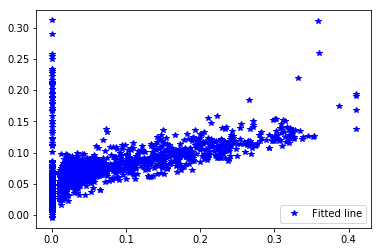

In [14]:
# Y_train,Y_pred
xid=0
yid=0
#     #Graphic display
# plt.plot(Xo_train[:,xid], Y_train[:,yid], 'r.', label='Original data')
# plt.plot(Xo_train[:,xid], Y_pred[:,yid],'b.', label='Fitted line')
plt.plot(Y_train_inv[:,yid], Y_pred_inv[:,yid],'b*', label='Fitted line')
plt.legend()
plt.show()

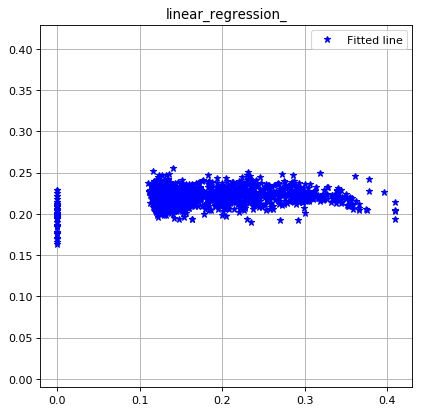

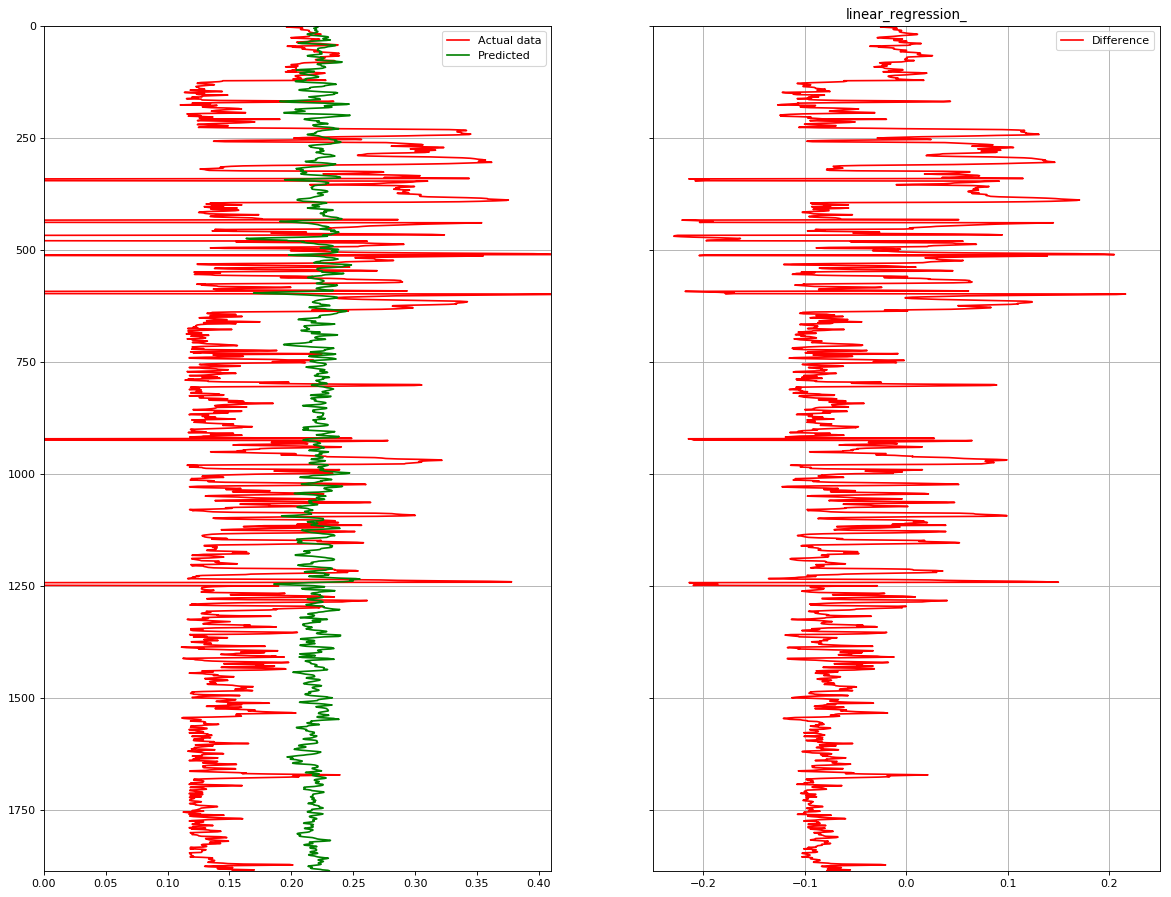

In [21]:
imname='linear_regression_'
yid=1
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi= 80, sharey=True)
# with ax_ as ax1:
ax1.plot(Y_train_inv[:,yid], Y_pred_inv[:,yid],'b*', label='Fitted line')
ax1.legend()
ax1.axis('equal')
ax1.grid(True)
plt.title(imname)
plt.show() #5000 epochs, 1024

fig1.savefig(imname+'_scatter.png', dpi=100)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 14), dpi= 80, sharey=True)
i=0
perc_diff=(-Y_pred_inv[:,yid]+Y_train_inv[:,yid])
for axes in ax:
    if(i==0):
        axes.plot( Y_train_inv[:,yid],range(len(Y_train_inv[:,yid])), label="Actual data",color='red')
        axes.plot( Y_pred_inv[:,yid],range(len(Y_pred_inv[:,yid])), label="Predicted",color='green')
        axes.set_xlim (min(Y_train_inv[:,yid]),max(Y_train_inv[:,yid]))
    else:
        axes.plot(perc_diff  ,range(len(perc_diff)), label="Difference",color='red')
        axes.set_xlim (-.25,+.25)
        axes.xaxis.grid(True)
#         axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
    i+=1
    axes.set_ylim (0,len(Y_train_inv[:,yid]))
    axes.legend()
    axes.invert_yaxis()
    axes.yaxis.grid(True)
plt.title(imname)
plt.show()  #5000 epochs, 1024
fig.savefig(imname+'_log.png', dpi=100)